<a href="https://colab.research.google.com/github/athibhash5/myworkouts/blob/main/EnsembleMethodsExamples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
#Random Forest

In [110]:
import pandas as pd
data=pd.read_csv('/content/kidney_disease.csv')

In [111]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [112]:
data.shape

(400, 26)

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [114]:
data.isna().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [115]:
data.isnull().sum()*100/len(data)

id                 0.00
age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.50
wc                26.25
rc                32.50
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

In [116]:
data1=data.drop(data[['id','rbc','wc','rc']],axis=1)
data1.head(2)

,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,...,pot,hemo,pcv,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.02,1.0,0.0,normal,notpresent,notpresent,121.0,36.0,...,NaN,15.4,44,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.02,4.0,0.0,normal,notpresent,notpresent,NaN,18.0,...,NaN,11.3,38,no,no,no,good,no,no,ckd


In [117]:
data2=data1.fillna(method='bfill')

The bfill method stands for "backward fill," and it fills missing values with the next valid observation along the column in a backward direction.



In [118]:
data2.isna().any()

age               False
bp                False
sg                False
al                False
su                False
pc                False
pcc               False
ba                False
bgr               False
bu                False
sc                False
sod               False
pot               False
hemo              False
pcv               False
htn               False
dm                False
cad               False
appet             False
pe                False
ane               False
classification    False
dtype: bool

In [119]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   pc              400 non-null    object 
 6   pcc             400 non-null    object 
 7   ba              400 non-null    object 
 8   bgr             400 non-null    float64
 9   bu              400 non-null    float64
 10  sc              400 non-null    float64
 11  sod             400 non-null    float64
 12  pot             400 non-null    float64
 13  hemo            400 non-null    float64
 14  pcv             400 non-null    object 
 15  htn             400 non-null    object 
 16  dm              400 non-null    object 
 17  cad             400 non-null    obj

In [120]:
data2.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc',
       'sod', 'pot', 'hemo', 'pcv', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'classification'],
      dtype='object')

In [121]:
a=['pc','pcc','ba','pcv','htn','dm','cad','appet','pe','ane','classification']
for i in a:
  print(data2[i].unique())

['normal' 'abnormal']
['notpresent' 'present']
['notpresent' 'present']
['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54']
['yes' 'no']
['yes' 'no' ' yes' '\tno' '\tyes']
['no' 'yes' '\tno']
['good' 'poor']
['no' 'yes']
['no' 'yes']
['ckd' 'ckd\t' 'notckd']


In [122]:
import numpy as np
from numpy import NaN

In [123]:
data2.pcv=data2.pcv.replace({'\t43':'43','\t?':np.NaN})
data2.pcv.unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', '16',
       '24', '37', '30', '34', '40', '45', '27', '48', nan, '52', '14',
       '22', '18', '42', '17', '46', '23', '19', '25', '41', '26', '15',
       '21', '43', '20', '47', '9', '49', '50', '53', '51', '54'],
      dtype=object)

In [124]:
data2=data2.fillna(method='bfill')
data2.pcv.unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', '16',
       '24', '37', '30', '34', '40', '45', '27', '48', '52', '14', '22',
       '18', '42', '17', '46', '23', '19', '25', '41', '26', '15', '21',
       '43', '20', '47', '9', '49', '50', '53', '51', '54'], dtype=object)

In [125]:
data2.pcv=data2.pcv.astype(float)


In [126]:
data2.dm=data2.dm.replace({' yes':'yes','\tyes':'yes','\tno':'no'})
data2.dm.unique()

array(['yes', 'no'], dtype=object)

In [127]:
data2['cad']=data2['cad'].replace({'\tno':'no'})
data2['cad'].unique()

array(['no', 'yes'], dtype=object)

In [128]:
data2.classification=data2.classification.replace({'ckd\t':'ckd'})
data2.classification.unique()

array(['ckd', 'notckd'], dtype=object)

In [129]:
a=['pc','pcc','ba','pcv','htn','dm','cad','appet','pe','ane','classification']
for i in a:
  print(i,'-',data2[i].unique())
data2.info()

pc - ['normal' 'abnormal']
pcc - ['notpresent' 'present']
ba - ['notpresent' 'present']
pcv - [44. 38. 31. 32. 35. 39. 36. 33. 29. 28. 16. 24. 37. 30. 34. 40. 45. 27.
 48. 52. 14. 22. 18. 42. 17. 46. 23. 19. 25. 41. 26. 15. 21. 43. 20. 47.
  9. 49. 50. 53. 51. 54.]
htn - ['yes' 'no']
dm - ['yes' 'no']
cad - ['no' 'yes']
appet - ['good' 'poor']
pe - ['no' 'yes']
ane - ['no' 'yes']
classification - ['ckd' 'notckd']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   pc              400 non-null    object 
 6   pcc             400 non-null    object 
 7   ba              400 non-null    object 
 8   bgr             400 non

In [130]:
data3=pd.get_dummies(data2,columns=['pc','pcc','ba','htn','dm','cad','appet','pe','ane'],drop_first=True,)
data3.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,classification,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,111.0,2.5,...,ckd,1,0,0,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,423.0,18.0,0.8,111.0,2.5,...,ckd,1,0,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,111.0,2.5,...,ckd,1,0,0,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,ckd,0,1,0,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,142.0,3.2,...,ckd,1,0,0,0,0,0,0,0,0


In [131]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data3.classification=le.fit_transform(data3.classification)
x=data3.drop(['classification'],axis=1)
x.head(2)

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pcv,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,48.0,80.0,1.02,1.0,0.0,121.0,36.0,1.2,111.0,2.5,...,44.0,1,0,0,1,1,0,0,0,0
1,7.0,50.0,1.02,4.0,0.0,423.0,18.0,0.8,111.0,2.5,...,38.0,1,0,0,0,0,0,0,0,0


In [132]:
y=data3.classification
y.head(2)

0    0
1    0
Name: classification, dtype: int64

In [133]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=0,test_size=0.20)

In [134]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=20,criterion='gini',max_depth=5,max_features=5)
help(rfc)

Help on RandomForestClassifier in module sklearn.ensemble._forest object:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------

**n_estimators**: The number of trees in the forest (default is 100).

**criterion**: The function used to measure the quality of a split. "gini" for Gini impurity or "entropy" for information gain (default is "gini").

**max_depth**: The maximum depth of the tree.

**max_features**: The number of features to consider when looking for the best split. here specified max_features=5, which means that, for each split, the algorithm considers 5 features randomly chosen from the total features.


In [135]:
rfc.fit(xtrain,ytrain)
ypred=rfc.predict(xtest)
ypred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1])

In [136]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('accuracy score:',accuracy_score(ytest,ypred))

accuracy score: 1.0


In [137]:
print('confusion matrix \n',confusion_matrix(ytest,ypred))

confusion matrix 
 [[52  0]
 [ 0 28]]


In [138]:
rfc.score(xtrain,ytrain)

1.0

In [139]:
rfc.score(xtest,ytest)

1.0

In [140]:
rfc.predict_proba(xtest) #1st col >probability to get 0, 2nd col> proba to get 1 in ypred

array([[1.        , 0.        ],
       [0.10877472, 0.89122528],
       [0.00807297, 0.99192703],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.0114063 , 0.9885937 ],
       [1.        , 0.        ],
       [0.95      , 0.05      ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.00648306, 0.99351694],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.00648306, 0.99351694],
       [1.        , 0.        ],
       [0.85536585, 0.14463415],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.00648306, 0.99351694],
       [1.        , 0.        ],
       [0.01007297, 0.98992703],
       [1.        , 0.        ],
       [0.00648306, 0.99351694],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.00848306, 0.99151694],
       [0.65527338, 0.34472662],
       [1.

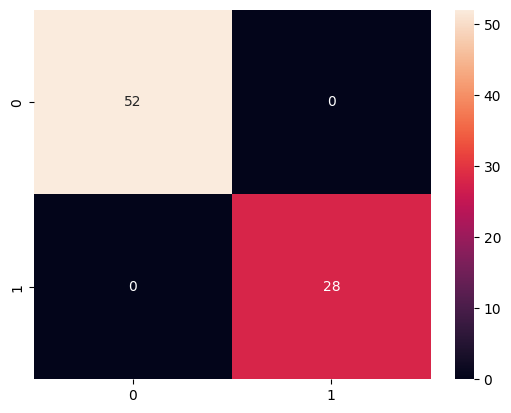

In [141]:
import seaborn
import matplotlib.pyplot as plt
cm=confusion_matrix(ytest,ypred)
seaborn.heatmap(cm,annot=True) #annot=True: This parameter adds the numerical annotations to each cell in the heatmap.
plt.show()

In [143]:
rfc.predict([[2,3,4,5,2,3,7,8,5,7,8,4,9,0,3,5,8,5,7,9,0]]) # giving a set of i/p values for all 21 cols

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [144]:
from sklearn.metrics import roc_auc_score
roc_auc_score(ytest,ypred)

1.0

 Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) score are commonly used metrics to evaluate the performance of binary classification models.

In [142]:
#Boosting

#**Adaboost**
Adaptive boosting or AdaBoost:. This method operates iteratively, identifying misclassified data points and adjusting their weights to minimize the training error.

In [145]:
import pandas as pd
data=pd.read_csv('/content/admissionData.csv')

In [146]:
data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


In [148]:
data['rank'].value_counts()

2    151
3    121
4     67
1     61
Name: rank, dtype: int64

In [149]:
x=data.iloc[:,1:4]
x.head(2)

,gre,gpa,rank
0,380,3.61,3
1,660,3.67,3


In [150]:
y=data.admit
y.head(2)

0    0
1    1
Name: admit, dtype: int64

In [151]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=0,test_size=0.2)
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()

In [152]:
xtrain1=sd.fit_transform(xtrain)
xtest1=sd.fit_transform(xtest)


In [153]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
base_estimator=DecisionTreeClassifier(max_depth=1)

In [154]:
adb=AdaBoostClassifier(base_estimator=base_estimator)
adb.fit(xtrain1,ytrain)
help(adb)

Help on AdaBoostClassifier in module sklearn.ensemble._weight_boosting object:

class AdaBoostClassifier(sklearn.base.ClassifierMixin, BaseWeightBoosting)
 |  AdaBoostClassifier(estimator=None, *, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None, base_estimator='deprecated')
 |  
 |  An AdaBoost classifier.
 |  
 |  An AdaBoost [1] classifier is a meta-estimator that begins by fitting a
 |  classifier on the original dataset and then fits additional copies of the
 |  classifier on the same dataset but where the weights of incorrectly
 |  classified instances are adjusted such that subsequent classifiers focus
 |  more on difficult cases.
 |  
 |  This class implements the algorithm known as AdaBoost-SAMME [2].
 |  
 |  Read more in the :ref:`User Guide <adaboost>`.
 |  
 |  .. versionadded:: 0.14
 |  
 |  Parameters
 |  ----------
 |  estimator : object, default=None
 |      The base estimator from which the boosted ensemble is built.
 |      Support for sampl

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [155]:
ypred=adb.predict(xtest1)
ypred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [156]:
adb.score(xtrain1,ytrain)

0.75

In [157]:
adb.score(xtest1,ytest)

0.6875

In [158]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

0.6875

##**XGBoost**
(eXtreme Gradient Boosting) is a powerful and popular machine learning library that is specifically designed for gradient boosting. It is known for its efficiency, speed, and high performance in various machine learning tasks. XGBoost can be used for both classification and regression problems.

In [161]:
import pandas as pd
data=pd.read_csv('/content/kc1_csv.csv')
data.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,83.0,11.0,1.0,11.0,171.0,927.89,0.04,23.04,40.27,21378.61,...,65,10,6,0,18.0,25.0,107.0,64.0,21.0,True
3,46.0,8.0,6.0,8.0,141.0,769.78,0.07,14.86,51.81,11436.73,...,37,2,5,0,16.0,28.0,89.0,52.0,15.0,True
4,25.0,3.0,1.0,3.0,58.0,254.75,0.11,9.35,27.25,2381.95,...,21,0,2,0,11.0,10.0,41.0,17.0,5.0,True


In [165]:
data.shape

(2109, 22)

In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2109 entries, 0 to 2108
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                2109 non-null   float64
 1   v(g)               2109 non-null   float64
 2   ev(g)              2109 non-null   float64
 3   iv(g)              2109 non-null   float64
 4   n                  2109 non-null   float64
 5   v                  2109 non-null   float64
 6   l                  2109 non-null   float64
 7   d                  2109 non-null   float64
 8   i                  2109 non-null   float64
 9   e                  2109 non-null   float64
 10  b                  2109 non-null   float64
 11  t                  2109 non-null   float64
 12  lOCode             2109 non-null   int64  
 13  lOComment          2109 non-null   int64  
 14  lOBlank            2109 non-null   int64  
 15  locCodeAndComment  2109 non-null   int64  
 16  uniq_Op            2109 

In [162]:
data.corr().defects

loc                  0.348405
v(g)                 0.295570
ev(g)                0.205159
iv(g)                0.295694
n                    0.355101
v                    0.339539
l                   -0.232877
d                    0.387493
i                    0.342854
e                    0.270070
b                    0.339028
t                    0.270071
lOCode               0.341529
lOComment            0.232866
lOBlank              0.323620
locCodeAndComment    0.005067
uniq_Op              0.385566
uniq_Opnd            0.386714
total_Op             0.348785
total_Opnd           0.362549
branchCount          0.297827
defects              1.000000
Name: defects, dtype: float64

In [163]:
x=data.drop(['defects'],axis=1)
y=data.defects

In [164]:
x[:2]

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,1.1,1.4,1.4,1.4,1.3,1.3,1.3,1.3,1.3,1.3,...,1.3,2,2,2,2,1.2,1.2,1.2,1.2,1.4
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1,1,1,1,1.0,1.0,1.0,1.0,1.0


In [166]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
x1=sd.fit_transform(x)

In [167]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x1,y,random_state=0,test_size=0.2)


In [168]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(xtrain,ytrain)
ypred=xgb.predict(xtest)
ypred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,

In [169]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(ytest,ypred)

0.8056872037914692

In [170]:
confusion_matrix(ytest,ypred)

array([[323,  30],
       [ 52,  17]])